In [16]:
import pandas as pd
import numpy as np
import random

# from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pylab as plt
from sklearn import preprocessing

import lightgbm as lgb
# import xgboost as xgb
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier

import missingno as msno
# import seaborn as sns

In [17]:
df = pd.read_csv("Train.csv")
y = df.target
x = df[["Policy Start Date", "Policy End Date", "Gender", "Age", "First Transaction Date", "No_Pol",
        "Car_Category", "Subject_Car_Colour", "Subject_Car_Make", "LGA_Name", "State", "ProductName"]]
variables = pd.read_csv("VariableDefinitions.csv")
variables

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [32]:
le = preprocessing.LabelEncoder()
x.Car_Category = le.fit_transform(x.Car_Category)

In [33]:
x

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,2010-05-14,2011-05-13,Male,30,2010-05-14,1,8,Black,TOYOTA,NaN,NaN,Car Classic
1,2010-11-29,2011-11-28,Female,79,2010-11-29,1,2,Grey,TOYOTA,NaN,NaN,Car Classic
2,2010-03-21,2011-03-20,Male,43,2010-03-21,1,8,Red,TOYOTA,NaN,NaN,Car Classic
3,2010-08-21,2011-08-20,Male,2,2010-08-21,1,16,NaN,NaN,NaN,NaN,CarSafe
4,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,16,NaN,NaN,Lagos,Lagos,Muuve
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,2010-05-25,2011-05-24,Female,30,2010-05-25,1,16,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic
12075,2010-10-03,2011-10-02,Female,59,2010-10-03,1,16,NaN,NaN,NaN,NaN,Car Classic
12076,2010-10-10,2011-10-08,Male,34,2010-10-10,1,16,NaN,NaN,NaN,NaN,CarSafe
12077,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,16,White,TOYOTA,Victoria Island,Lagos,CVTP


In [15]:
x.Subject_Car_Colour.value_counts()

Black             1880
Silver             554
Grey               514
As Attached        498
Blue               361
White              293
Red                251
Green              233
Gold               173
Ash                133
Wine                89
Brown               58
Yellow               8
Cream                8
Dark Gray            5
White & Blue         5
Orange               5
Purple               4
Red & White          4
D. Red               3
Blue & Red           3
Light Green          3
Dark Blue            2
White & Red          2
Red & Black          2
Gray & Gray          2
Gray & Silver        2
Black & White        2
B.Silver             2
Black & Orange       2
Dark Grey            2
Blue Sky             1
Beige Mitalic        1
White & Yellow       1
Red & Yellow         1
Light Blue           1
Red & Blue           1
Light Gray           1
Blue&White&Red       1
Dark Red             1
Dark Green           1
D. Gold              1
Champagne            1
Burgundy   

<AxesSubplot:>

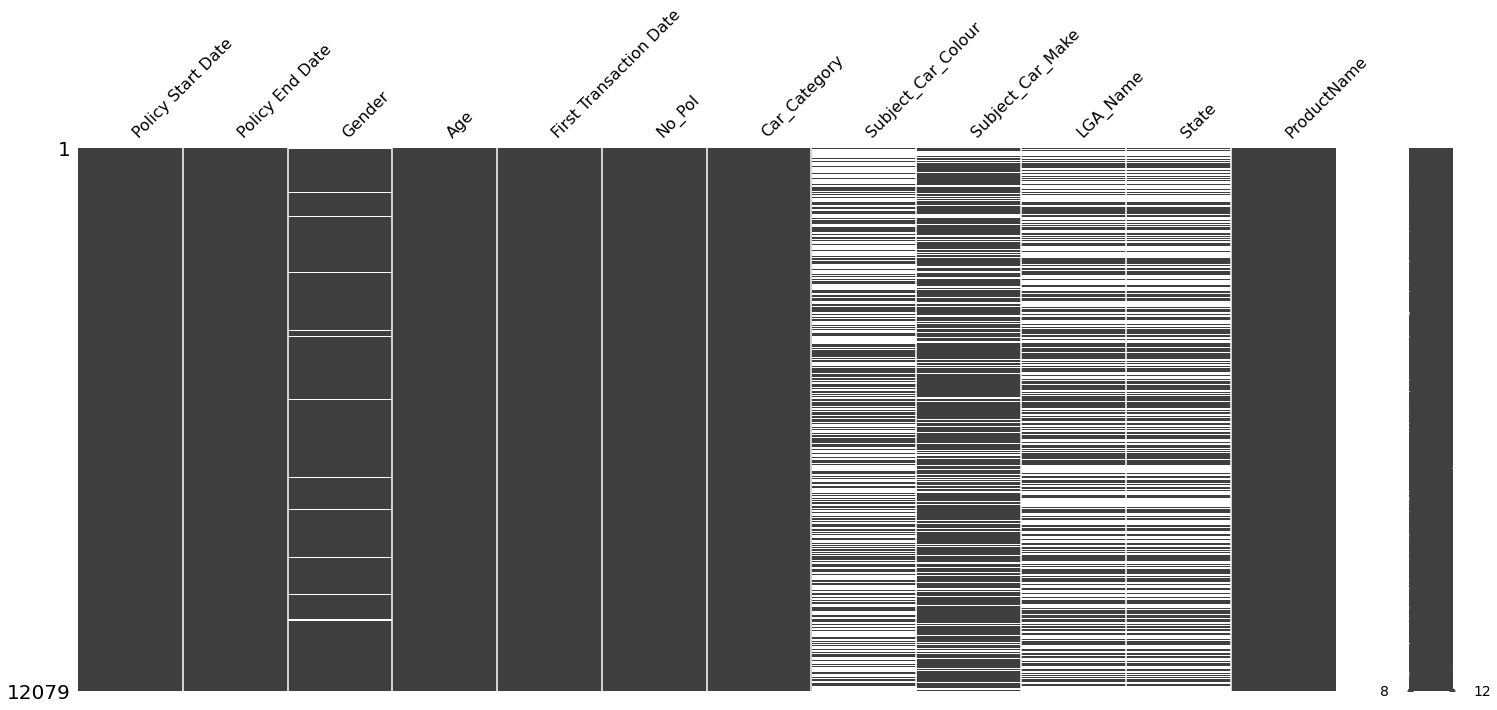

In [12]:
msno.matrix(x)

In [14]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', f1_score(y_true, y_hat), True

In [26]:
score = 0
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=2020)
for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    # model = lgb.LGBMClassifier(metric = lgb_f1_score)
    model = lgb.LGBMClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scorep = f1_score(y_pred, y_test)
    score += scorep
print("lightgbm mean f1_score:", score/5)

lightgbm mean f1_score: 0.23128745281006347
